# **Lab Exercise 1 part 2**

# Requirements

In [279]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time

# Configuration

In [281]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [283]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [284]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [286]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/google-topics-api.20241104-8-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20241104-8-RELEASE.js"></script><script type="text/javascript" src="//gum.criteo.com/sync?c=72&amp;r=2&amp;j=TRC.getRTUS&amp;us_privacy=1---&amp;gdpr=0&amp;gdpr_consent=&amp;gdpr_pd="></script><script type="text/javascript" async="" src="//pm-widget.taboola.com/yahooweb-network/load.js"></script>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect" 

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

# **Extracting cryptocurrency names and prices for one page**

In [289]:
listaOdElementi = browser.find_elements(By.CSS_SELECTOR, 'tr.row.false.yf-paf8n5')

In [291]:
len(listaOdElementi)

25

In [293]:
#funkcija za kreiranje Dict od sekoj element
def createDictionary(elementi):
    listOfDictionaries = []

    for edenElement in elementi:
        ime = edenElement.find_element(By.CLASS_NAME, 'yf-h8l7j7')
        if ime is not None:
            ime = ime.text
        
        cena = edenElement.find_element(By.CSS_SELECTOR, 'fin-streamer[data-field="regularMarketPrice"]')
        if cena is not None:
            cena = cena.text
    
        marketcap = edenElement.find_element(By.CSS_SELECTOR, 'fin-streamer[data-field="marketCap"]')
        if marketcap is not None:
            marketcap = marketcap.text

        elementDict = {
        "Cryptocurrency names" : ime,
        "Price" : cena,
        "Market cap" : marketcap,
        }
        
        listOfDictionaries.append(elementDict)

    return listOfDictionaries

In [295]:
myData=createDictionary(listaOdElementi)
df=pd.DataFrame(myData)
df

,Cryptocurrency names,Price,Market cap
0,Bitcoin USD,"68,757.72",1.36T
1,Ethereum USD,"2,440.06",293.825B
2,Tether USDt USD,0.999637,120.453B
3,BNB USD,559.54,80.63B
4,Solana USD,163.07,76.793B
5,USD Coin USD,1.0000,35.153B
6,XRP USD,0.506972,28.831B
7,Dogecoin USD,0.169118,24.804B
8,Lido Staked ETH USD,"2,442.39",23.823B
9,Wrapped TRON USD,0.161681,14.135B


# **Scraping multiple pages**

In [297]:
def scrapeMultiplePages(firstPage, lastPage):
    dataFromAllPages = []

    for i in range(firstPage, lastPage+1, 25):
        url = f'https://finance.yahoo.com/markets/crypto/all/?start={i}&count=25'
        browser.get(url)
        
        listaOdElementi = browser.find_elements(By.CSS_SELECTOR, 'tr.row.false.yf-paf8n5')

        dataFromOnePage=createDictionary(listaOdElementi)
        dataFromAllPages.extend(dataFromOnePage)

    df = pd.DataFrame(dataFromAllPages)
    return df 

In [299]:
df = scrapeMultiplePages(0,100)

In [300]:
print(df)

    Cryptocurrency names      Price Market cap
0            Bitcoin USD  68,757.72      1.36T
1           Ethereum USD   2,440.06   293.825B
2        Tether USDt USD   0.999637   120.453B
3                BNB USD     559.54     80.63B
4             Solana USD     163.07    76.793B
..                   ...        ...        ...
120             ORDI USD      31.37   658.672M
121             Gala USD   0.018391   649.918M
122             Frax USD   0.996333   647.052M
123              Neo USD     9.0787   640.402M
124              EOS USD   0.419223     639.5M

[125 rows x 3 columns]


# **Creating a Histogram** 

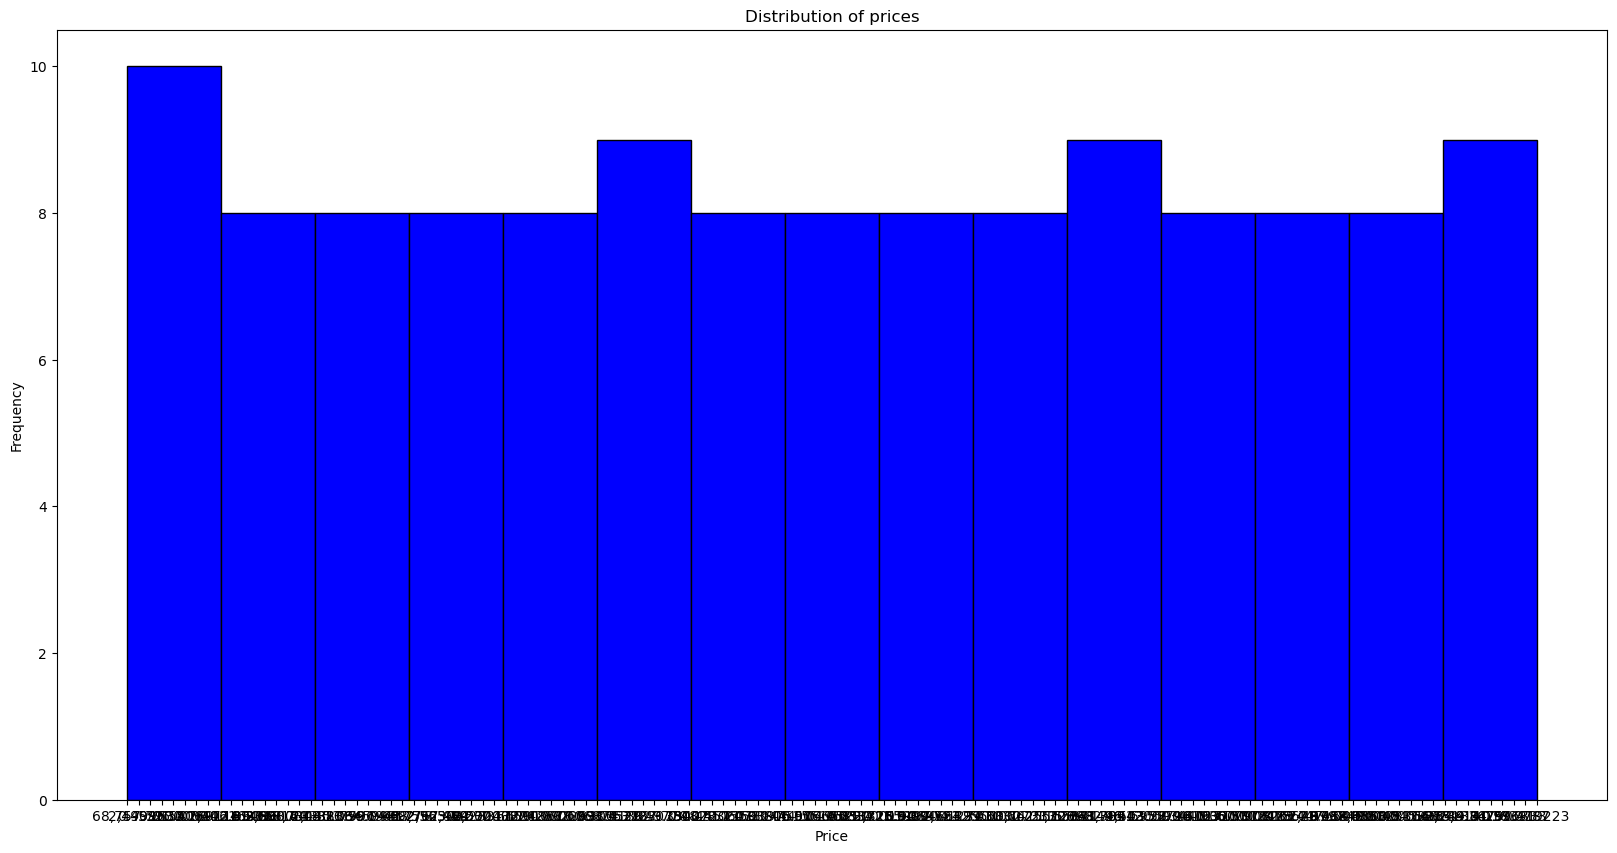

In [301]:
plt.figure(figsize=(20, 10))
plt.hist(df['Price'].dropna(), bins=15, color='blue', edgecolor='black')
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

**Find the BTC-USD symbol**

In [305]:
browser.get('https://finance.yahoo.com/crypto')

In [307]:
symbol = browser.find_element(By.LINK_TEXT, 'BTC-USD')
symbol.click()
time.sleep(5)

historicalData = browser.find_element(By.LINK_TEXT, 'Historical Data')
historicalData.click()
time.sleep(5)

#Extracting the historical data for each element
hdPrice = browser.find_elements(By.CSS_SELECTOR, "td:nth-child(5)")
hdDate = browser.find_elements(By.CSS_SELECTOR, "td:nth-child(1)")
hdMarketCap = browser.find_elements(By.CSS_SELECTOR, "td:nth-child(7)")

#Formatting the data
dataPrices = [float(price.text.replace(',', '')) if price.text else None for price in hdPrice] #convert to float
dataDates = [date.text for date in hdDate] #create list of values
dataMarketCaps = [cap.text.replace(',', '') for cap in hdMarketCap] #create list of values

#creating dictionary, and list of dictionaries for each data
hdList = []
for i in range(len(dataPrices)):
    hdDictionary = {
        "Date": dataDates[i],
        "Price": dataPrices[i],
        "Market Cap": dataMarketCaps[i]
    }
    hdList.append(hdDictionary)

hdDataFrame = pd.DataFrame(hdList)

In [310]:
hdDataFrame

,Date,Price,Market Cap
0,"Nov 5, 2024",68734.91,41671991296
1,"Nov 4, 2024",67811.51,41184819348
2,"Nov 3, 2024",68741.12,34868307655
3,"Nov 2, 2024",69289.27,18184612091
4,"Nov 1, 2024",69482.47,49989795365
...,...,...,...
362,"Nov 9, 2023",36693.13,37762672382
363,"Nov 8, 2023",35655.28,17295394918
364,"Nov 7, 2023",35443.56,18834737789
365,"Nov 6, 2023",35037.37,12693436420


**Make a Histogram**

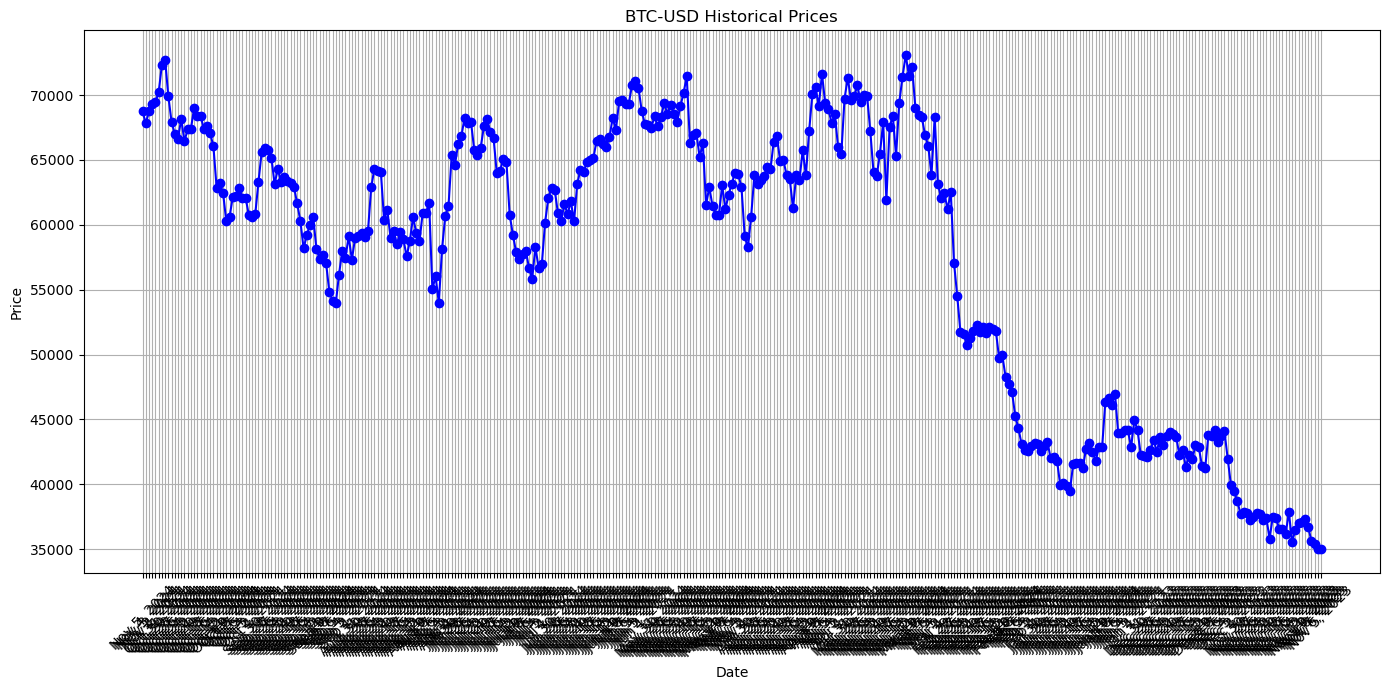

In [314]:
plt.figure(figsize=(14, 7))
plt.plot(hdDataFrame['Date'], hdDataFrame['Price'], marker='o', color='b', linestyle='-')
plt.title("BTC-USD Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()